In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
telco_pd = pd.read_csv('telco_churn.csv')
telco_pd

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
telco_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [4]:
telco_pd.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
telco_pd.drop(columns=['Unnamed: 0', 'customerID' ],inplace=True)
telco_pd

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
telco_pd['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [7]:
telco_pd.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [9]:
# convert total charges from object to numerical
telco_pd['TotalCharges'] = pd.to_numeric(telco_pd['TotalCharges'],errors='coerce')
telco_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
telco_pd.isnull().sum()
telco_pd['TotalCharges'].fillna(0,inplace=True)

In [11]:
encoder = OneHotEncoder()
scaler = MinMaxScaler()

In [12]:
def preprocessing(dataframe,drop=None):
    y=dataframe['Churn']
    if drop==None:
        dataframe = dataframe
    else:
        length = len(drop)
        if length == 1:
            dataframe = dataframe.drop(columns=[str(drop)])
        else:
            dataframe = dataframe.drop(columns=[str(d) for d in drop])
    dataframe = dataframe.drop(columns=["Churn"])
    numeric_features = dataframe.columns[dataframe.dtypes!=object].tolist()
    categorical_features = dataframe.columns[dataframe.dtypes==object].tolist()
    num = scaler.fit_transform(dataframe[numeric_features])
    cat = encoder.fit_transform(dataframe[categorical_features].values).toarray()
    cat_df = pd.DataFrame(cat,columns=encoder.get_feature_names(categorical_features))
    num_df = pd.DataFrame(num,columns=numeric_features)
    x = pd.merge(num_df,cat_df,left_index=True,right_index=True)
    return x,y
    

In [13]:
x,y = preprocessing(telco_pd)

In [14]:
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.003437,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.217564,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.012453,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.211951,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.017462,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0.229194,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,0.0,1.000000,0.845274,0.847792,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,0.0,0.152778,0.112935,0.039892,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7041,1.0,0.055556,0.558706,0.035303,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [15]:
telco_pd.PaperlessBilling.value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [16]:
x.PaperlessBilling_Yes.value_counts()

1.0    4171
0.0    2872
Name: PaperlessBilling_Yes, dtype: int64

In [17]:
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=34,train_size=0.7)

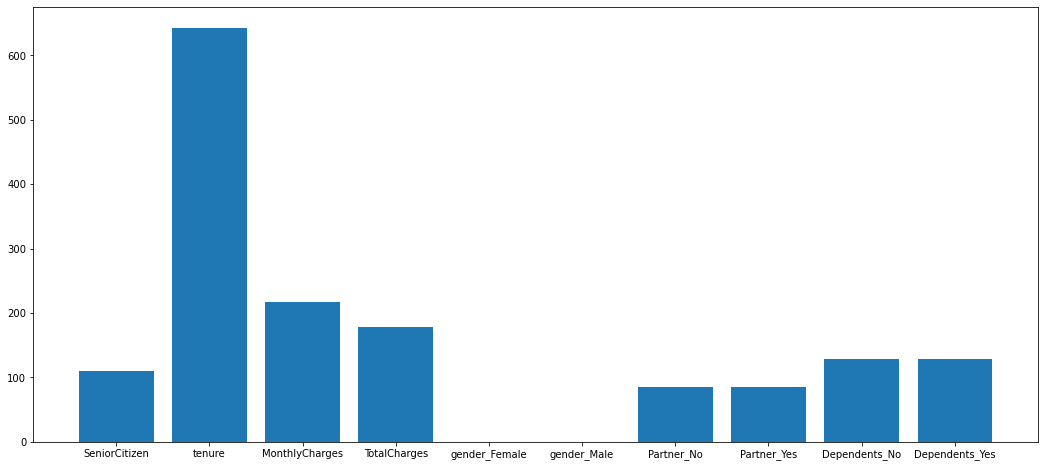

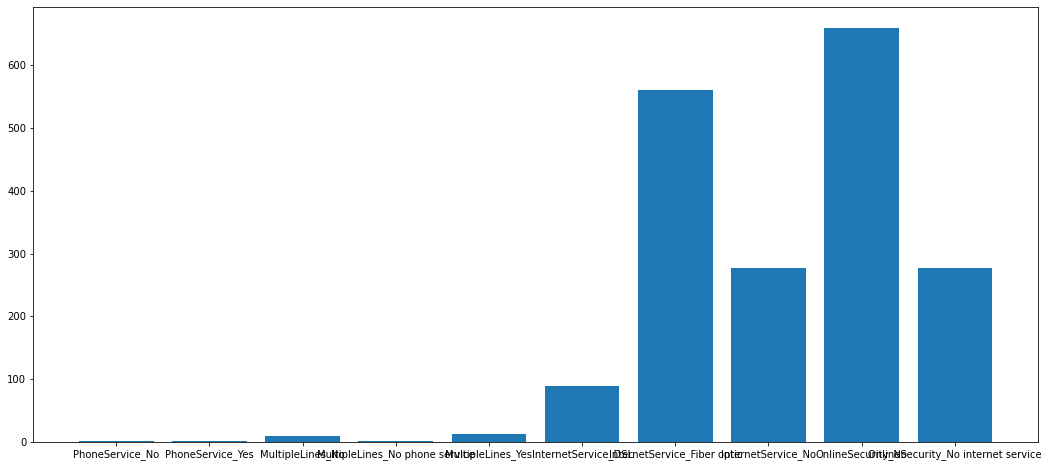

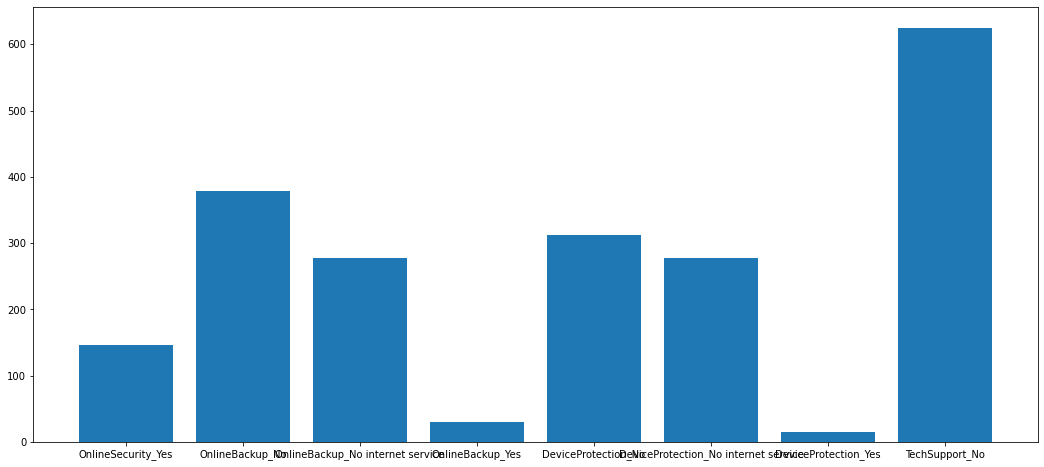

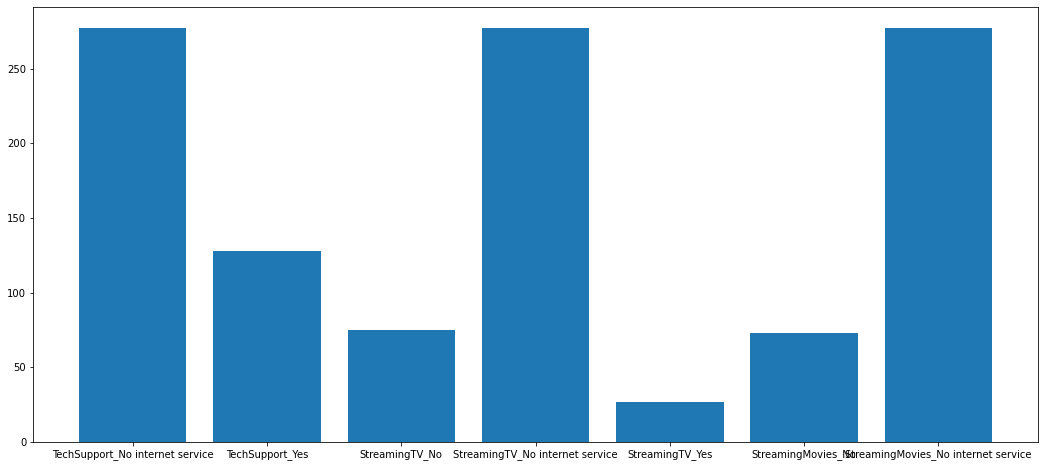

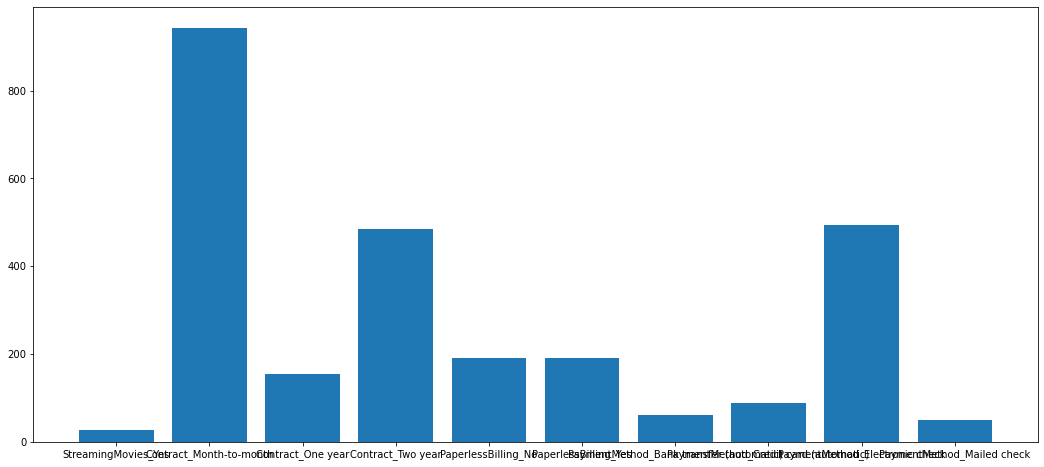

In [19]:
from sklearn.feature_selection import SelectKBest
feature_sel = SelectKBest(k='all')
feature_sel.fit(x_train,y_train)
# x_train_fs = feature_sel.transform(x_train)
feat = pd.DataFrame(feature_sel.scores_,columns=['Data'])
feat['features']=x_train.columns
feat1 = feat[:10]
feat2 = feat[10:20]
feat3 = feat[20:28]
feat4 = feat[28:35]
feat5 = feat[35:]
feats = [feat1,feat2,feat3,feat4,feat5]
for no in feats:
    plt.figure(figsize=(18,8))
    plt.bar(no.features,no.Data)
# plt.bar(feat1.features,feat1.Data)
# plt.bar(feat2.features,feat2.Data)
# plt.bar(feat3.features,feat3.Data)
# plt.bar(feat4.features,feat4.Data)
    plt.show()

In [20]:
log_model = LogisticRegression()
skf = StratifiedKFold(n_splits=5,random_state=2,shuffle=True)
score = cross_val_score(log_model,x_train,y_train,cv=skf)
score

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

array([0.81947262, 0.79208925, 0.78600406, 0.81947262, 0.82150101])

In [21]:
svm_model = svm.SVC()
skf = StratifiedKFold(n_splits=5,random_state=2,shuffle=True)
score = cross_val_score(svm_model,x_train,y_train,cv=skf)
score

array([0.81845842, 0.78296146, 0.78701826, 0.80324544, 0.81541582])

In [22]:
forest_model = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5,random_state=2,shuffle=True)
score = cross_val_score(forest_model,x_train,y_train,cv=skf)
score

array([0.79817444, 0.78803245, 0.79614604, 0.78701826, 0.81135903])

In [23]:
def modeling(model, x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    return print(classification_report(y_test,y_predict))

In [24]:
modeling(log_model,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1543
         Yes       0.64      0.54      0.58       570

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113



C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
modeling(svm_model,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

          No       0.82      0.89      0.86      1543
         Yes       0.62      0.48      0.54       570

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.77      0.78      0.77      2113



In [26]:
modeling(forest_model,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

          No       0.83      0.89      0.86      1543
         Yes       0.63      0.49      0.55       570

    accuracy                           0.78      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



## it appears the model is biased toward no churn, have to oversample it

In [27]:
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [28]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [29]:
x_train,y_train = SMOTE(random_state=32).fit_resample(x_train,y_train)

In [30]:
y_train.value_counts()

No     3631
Yes    3631
Name: Churn, dtype: int64

In [31]:
log_model = LogisticRegression()
skf = StratifiedKFold(n_splits=5,random_state=2,shuffle=True)
score = cross_val_score(log_model,x_train,y_train,cv=skf)
score

array([0.77632485, 0.78114246, 0.78099174, 0.79338843, 0.76515152])

In [32]:
svm_model = svm.SVC()
skf = StratifiedKFold(n_splits=5,random_state=2,shuffle=True)
score = cross_val_score(svm_model,x_train,y_train,cv=skf)
score

array([0.81142464, 0.82656573, 0.81818182, 0.83677686, 0.80991736])

In [33]:
forest_model = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5,random_state=2,shuffle=True)
score = cross_val_score(forest_model,x_train,y_train,cv=skf)
score

array([0.85340674, 0.86510668, 0.86432507, 0.86639118, 0.8546832 ])

# testing on test set

In [34]:
modeling(log_model,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

          No       0.91      0.75      0.82      1543
         Yes       0.54      0.80      0.64       570

    accuracy                           0.76      2113
   macro avg       0.72      0.77      0.73      2113
weighted avg       0.81      0.76      0.77      2113



In [35]:
modeling(svm_model,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

          No       0.87      0.81      0.84      1543
         Yes       0.56      0.67      0.61       570

    accuracy                           0.77      2113
   macro avg       0.71      0.74      0.72      2113
weighted avg       0.78      0.77      0.77      2113



In [36]:
modeling(forest_model,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

          No       0.84      0.86      0.85      1543
         Yes       0.59      0.55      0.57       570

    accuracy                           0.77      2113
   macro avg       0.71      0.70      0.71      2113
weighted avg       0.77      0.77      0.77      2113



In [37]:
x_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.458333,0.497512,0.249994,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.000000,0.000000,0.0,0.0,1.0,0.0
1,0.000000,0.750000,0.516418,0.427834,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.000000,1.000000,0.0,1.0,0.0,0.0
2,0.000000,0.680556,0.850249,0.579898,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,0.0
3,0.000000,0.041667,0.672139,0.031342,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.000000,0.000000,0.0,0.0,1.0,0.0
4,0.000000,0.791667,0.843781,0.682313,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,1.000000,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7257,0.000000,0.533079,0.562526,0.330781,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.713018,0.286982,0.0,1.0,0.0,0.0
7258,0.502606,0.359591,0.630508,0.252715,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.000000,1.000000,1.0,0.0,0.0,0.0
7259,1.000000,0.394928,0.767898,0.322132,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.000000,1.000000,0.0,0.0,1.0,0.0
7260,0.000000,0.205902,0.812653,0.174434,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,1.0


In [38]:
telco_pd

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# time for EDA


In [39]:
churn_no = {'Yes':1,'No':0}
telco_pd.Churn.replace(churn_no,inplace=True)
telco_pd

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


[]

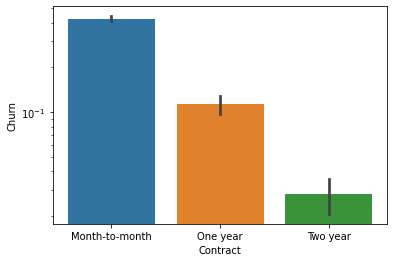

In [40]:
sns.barplot(data=telco_pd,y='Churn',x='Contract')
plt.yscale('log')
plt.plot()

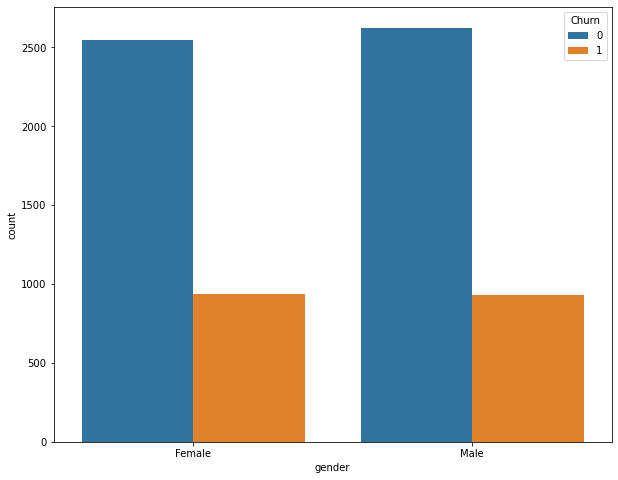

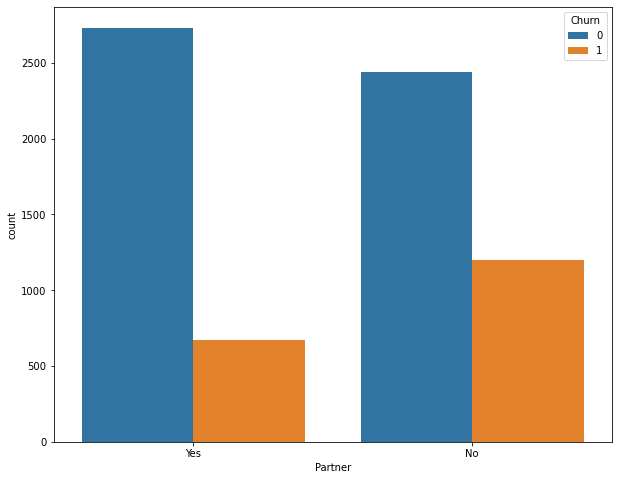

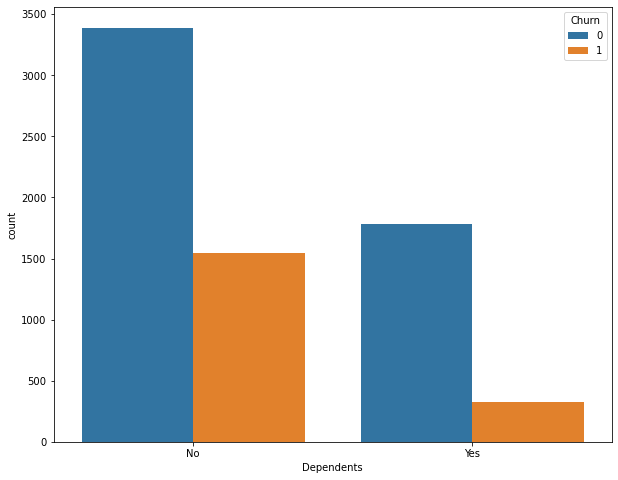

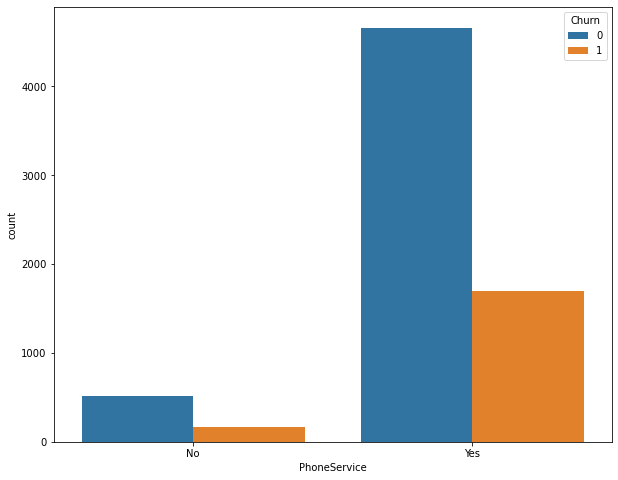

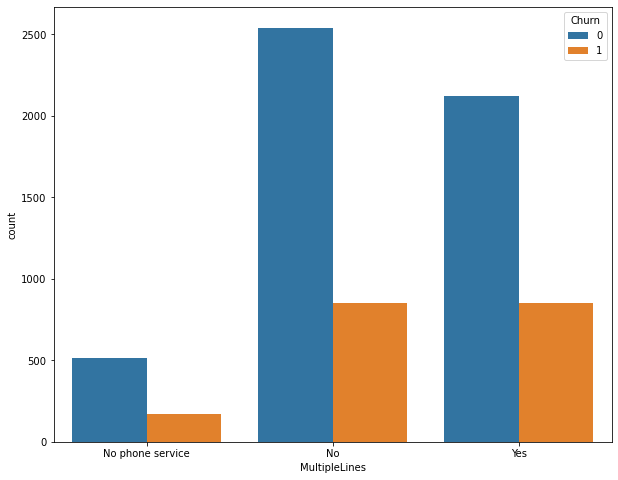

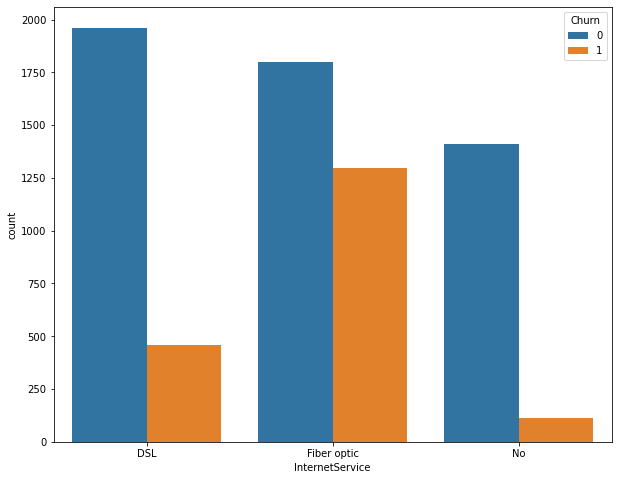

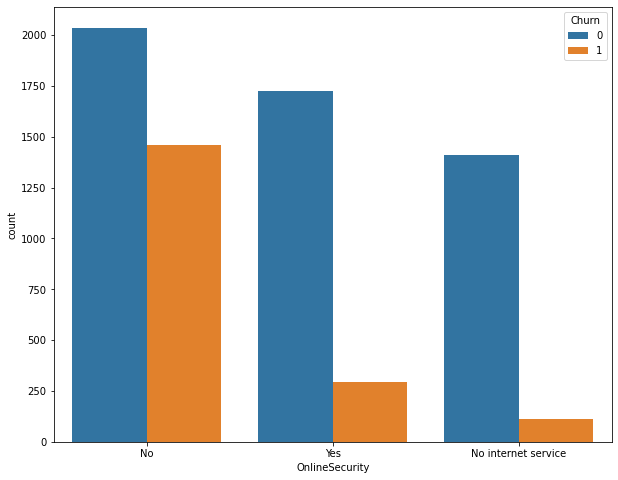

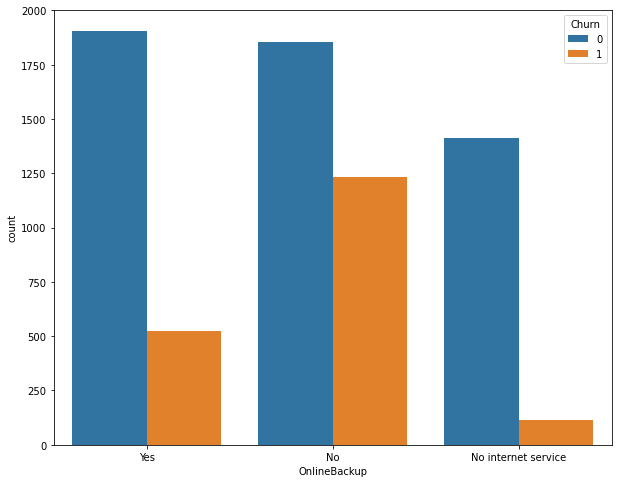

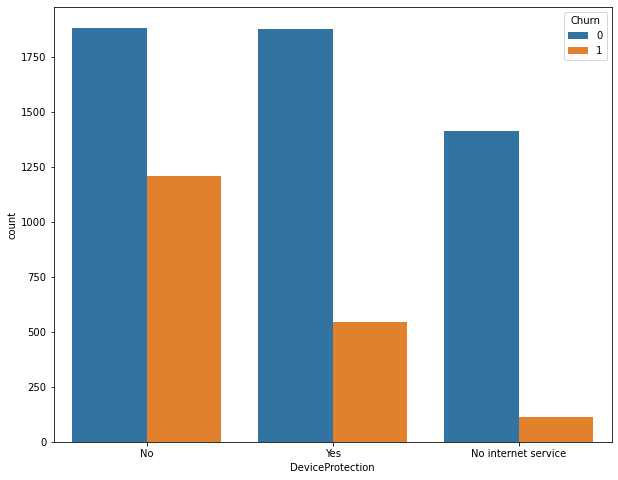

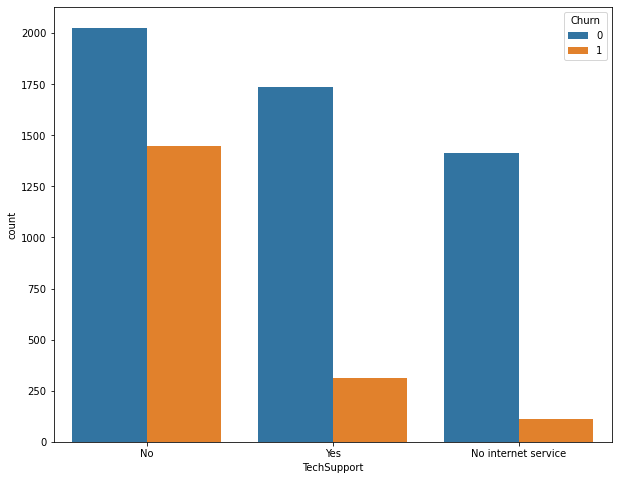

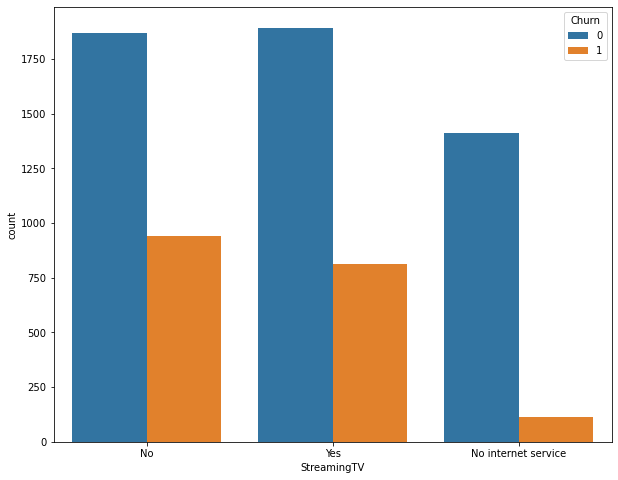

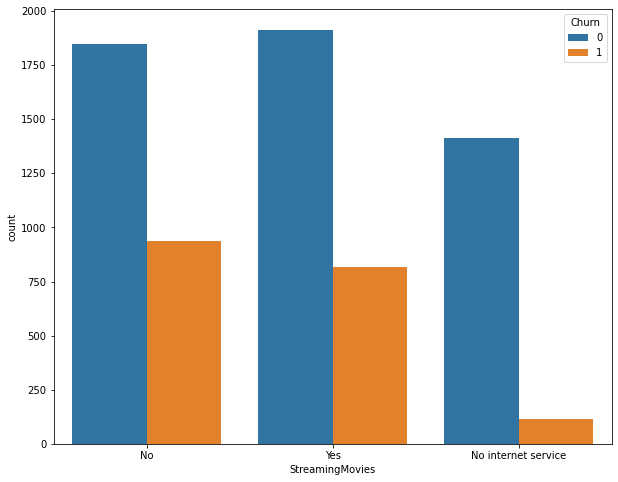

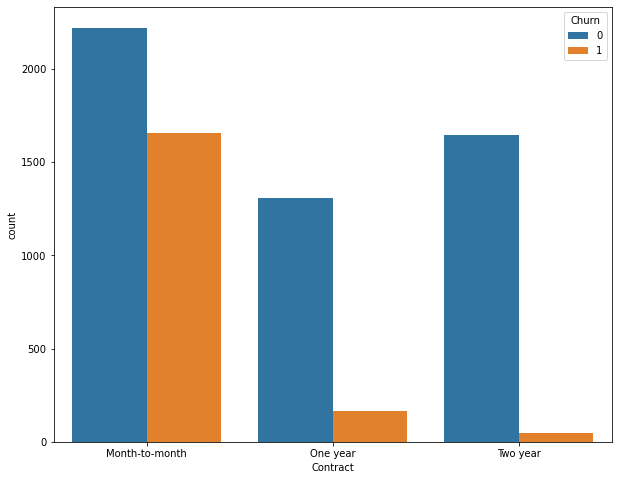

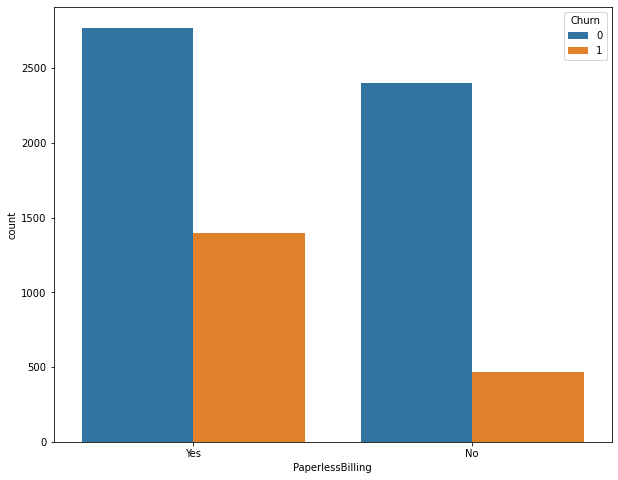

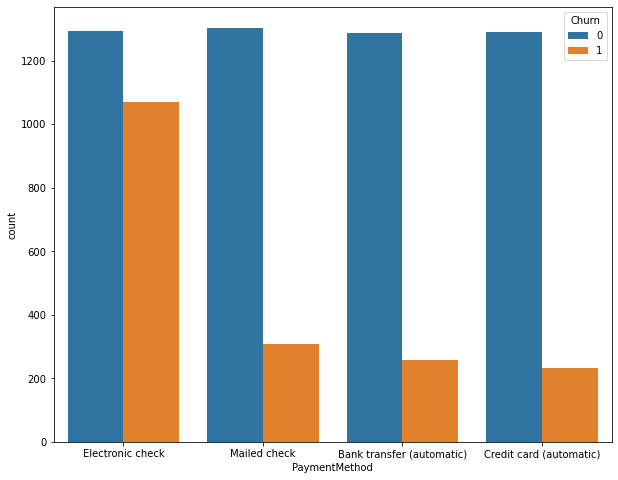

In [60]:
category_features = telco_pd.columns[telco_pd.dtypes==object].to_list()
category_features
for no, col in enumerate(category_features):
    plt.figure(figsize=(10,8))
#     plt.subplot(7,3,no+1)
    sns.countplot(x=col, data=telco_pd, hue='Churn')
    plt.show()

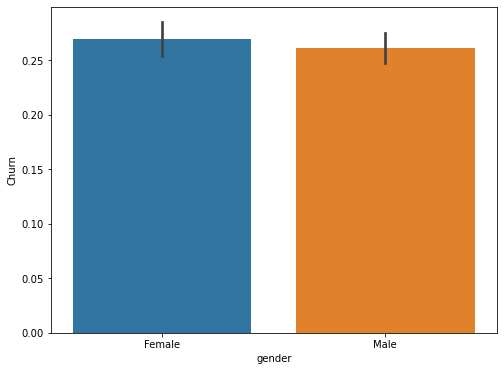

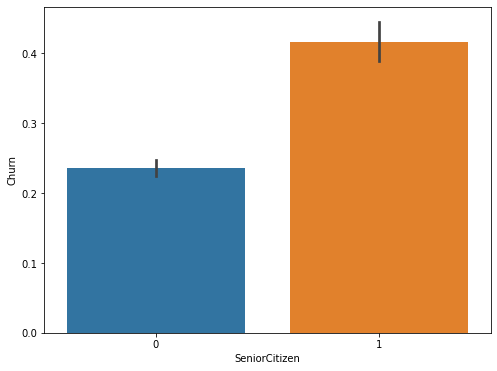

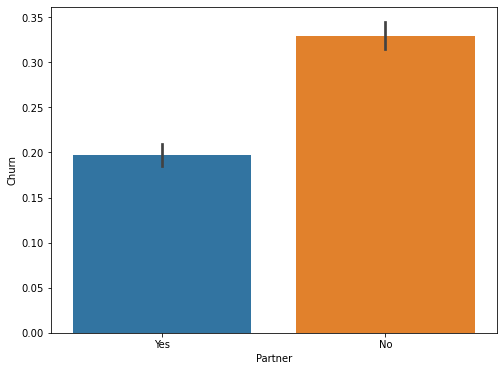

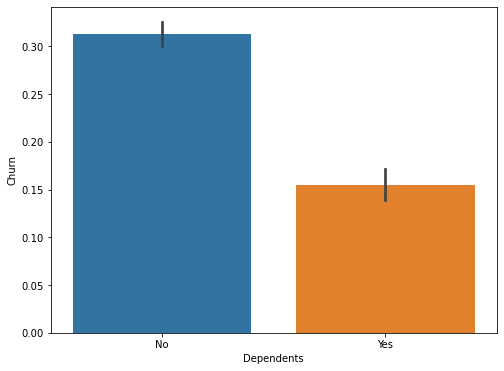

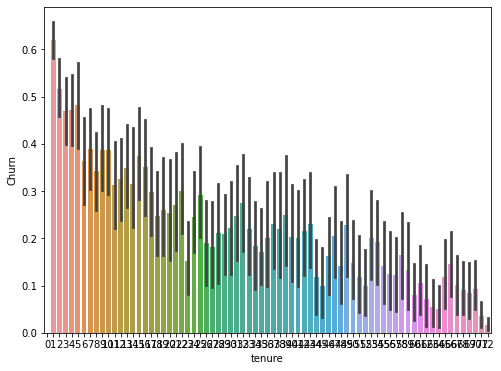

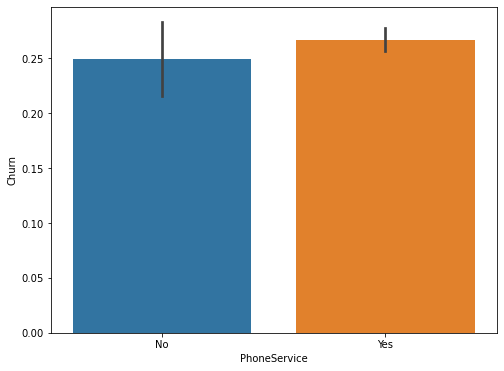

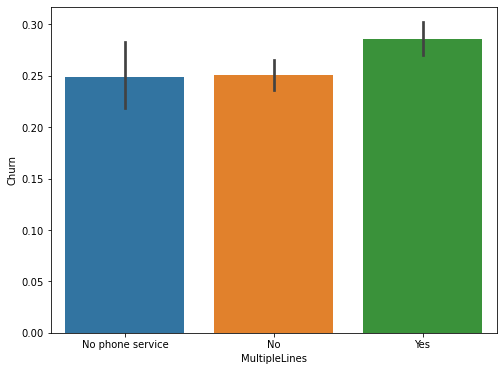

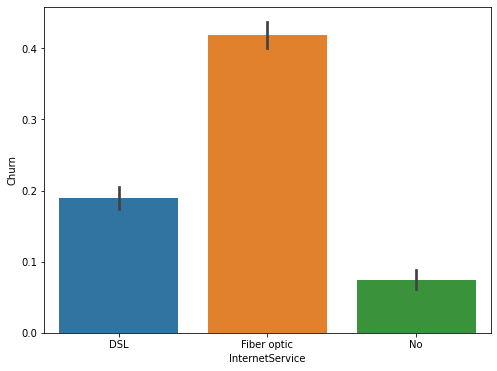

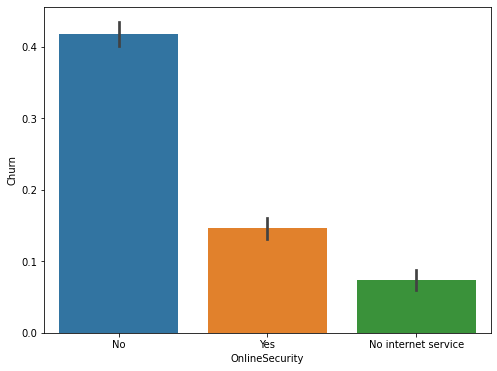

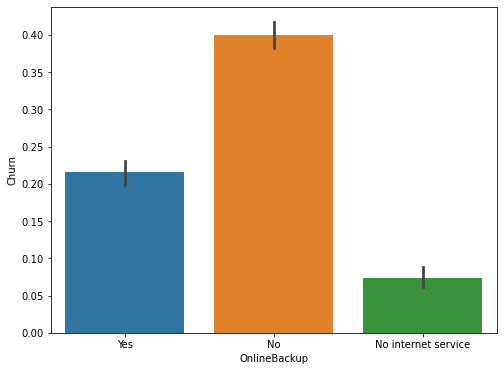

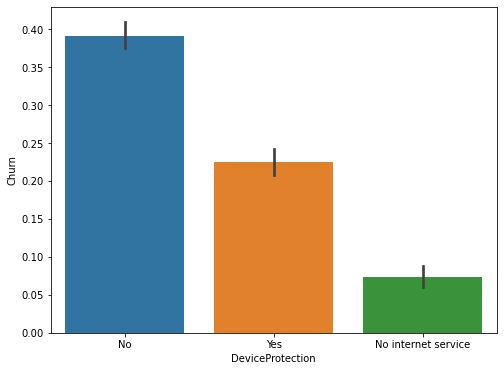

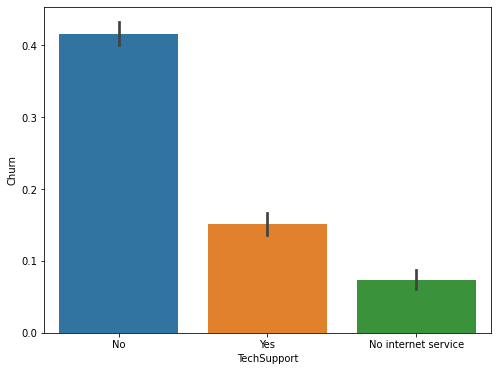

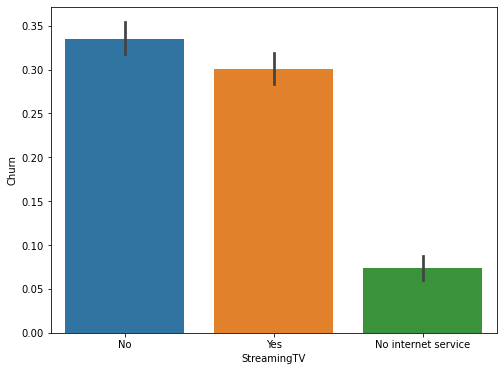

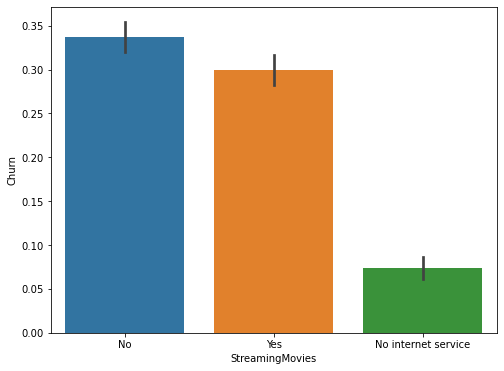

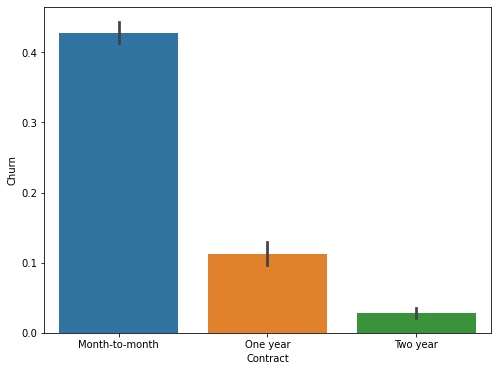

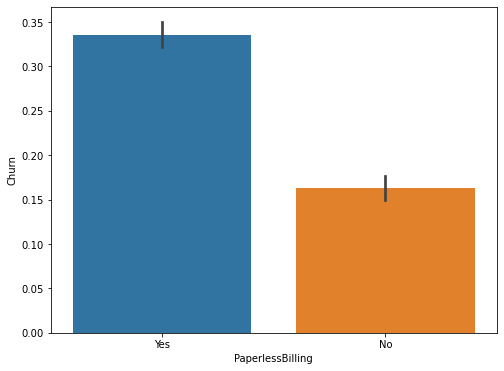

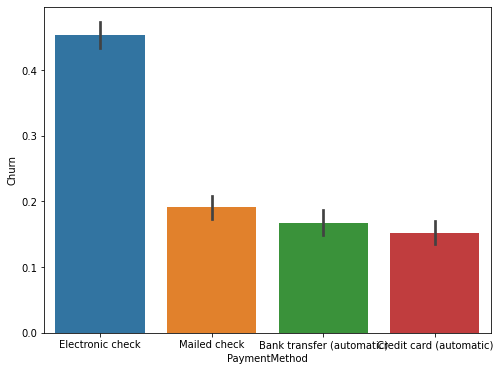

KeyboardInterrupt: 

In [42]:
for no,columns in enumerate(telco_pd.columns):
    plt.subplot(7,3,no+1)
    plt.figure(figsize=(8,6))
    sns.displot()
    sns.barplot(data=telco_pd,x=columns,y='Churn')
    plt.xlabel(f'{columns}')
    plt.show()

In [28]:
telco_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## using smote on the dataset

In [43]:
x,y = preprocessing(telco_pd)
x,y = SMOTE(random_state=32).fit_resample(x,y)

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=34,train_size=0.7)

In [45]:
log_model = LogisticRegression()
skf = StratifiedKFold(n_splits=5,random_state=2,shuffle=True)
score = cross_val_score(log_model,x_train,y_train,cv=skf)
score

array([0.77846791, 0.77432712, 0.79227053, 0.76312155, 0.78453039])

In [46]:
modeling(log_model,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1583
           1       0.76      0.83      0.79      1522

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



In [47]:
log_model = LogisticRegression()
modeling(log_model,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1583
           1       0.76      0.83      0.79      1522

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



In [48]:
telco_pd.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [68]:
telco_pd.MonthlyCharges.value_counts()

20.05     61
19.85     45
19.90     44
19.95     44
19.65     43
          ..
87.65      1
35.30      1
114.85     1
56.50      1
97.25      1
Name: MonthlyCharges, Length: 1585, dtype: int64

## undersamplying the dataset

In [49]:
x,y = preprocessing(telco_pd)

In [50]:
x,y = RandomUnderSampler(random_state=32).fit_resample(x,y)

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=34,train_size=0.7)

In [52]:
log_model = LogisticRegression()
skf = StratifiedKFold(n_splits=5,random_state=2,shuffle=True)
score = cross_val_score(log_model,x_train,y_train,cv=skf)
score

array([0.77290076, 0.76099426, 0.76099426, 0.76290631, 0.791587  ])

In [53]:
y_train.value_counts()

0    1316
1    1300
Name: Churn, dtype: int64

In [54]:
log_model = LogisticRegression()
modeling(log_model,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       553
           1       0.74      0.78      0.76       569

    accuracy                           0.75      1122
   macro avg       0.75      0.75      0.75      1122
weighted avg       0.75      0.75      0.75      1122



In [75]:
coef_df = pd.DataFrame(log_model.coef_)
coef_df = coef_df.transpose()
coef_df['features'] = x.columns
# coef_df['coefficienct'] = log_model.coef_
coef_df

,0,features
0,0.226901,SeniorCitizen
1,-2.867432,tenure
2,0.069223,MonthlyCharges
3,0.405680,TotalCharges
4,0.083888,gender_Female
5,-0.077891,gender_Male
6,0.036757,Partner_No
7,-0.030760,Partner_Yes
8,0.016667,Dependents_No
9,-0.010671,Dependents_Yes


In [76]:
telco_pd.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## dropping phoneservice and multiplelines

In [55]:
x,y = preprocessing(telco_pd,drop=['PhoneService','MultipleLines'])

In [56]:
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.003437,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.217564,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.012453,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.211951,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.017462,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0.229194,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,0.0,1.000000,0.845274,0.847792,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,0.0,0.152778,0.112935,0.039892,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7041,1.0,0.055556,0.558706,0.035303,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [57]:
x,y = RandomUnderSampler(random_state=32).fit_resample(x,y)

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=34,train_size=0.7)

In [59]:
log_model = LogisticRegression()
skf = StratifiedKFold(n_splits=5,random_state=2,shuffle=True)
score = cross_val_score(log_model,x_train,y_train,cv=skf)
score

array([0.76335878, 0.76481836, 0.76481836, 0.77055449, 0.78393881])

In [60]:
log_model = LogisticRegression()
modeling(log_model,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       553
           1       0.74      0.79      0.76       569

    accuracy                           0.75      1122
   macro avg       0.76      0.75      0.75      1122
weighted avg       0.75      0.75      0.75      1122



In [61]:
forest_model = RandomForestClassifier()
modeling(forest_model,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       553
           1       0.74      0.74      0.74       569

    accuracy                           0.73      1122
   macro avg       0.73      0.73      0.73      1122
weighted avg       0.73      0.73      0.73      1122



In [62]:
svm_model = svm.SVC()
modeling(svm_model,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.76      0.69      0.73       553
           1       0.73      0.79      0.76       569

    accuracy                           0.74      1122
   macro avg       0.75      0.74      0.74      1122
weighted avg       0.75      0.74      0.74      1122



## dropping gender and partner

In [63]:
x,y = preprocessing(telco_pd,drop=['gender','Partner'])

In [64]:
x,y = RandomUnderSampler(random_state=32).fit_resample(x,y)

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=34,train_size=0.7)

In [66]:
log_model = LogisticRegression()
skf = StratifiedKFold(n_splits=5,random_state=2,shuffle=True)
score = cross_val_score(log_model,x_train,y_train,cv=skf)
score

array([0.77480916, 0.76290631, 0.75525813, 0.76864245, 0.78967495])

In [67]:
log_model = LogisticRegression()
modeling(log_model,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       553
           1       0.74      0.79      0.76       569

    accuracy                           0.75      1122
   macro avg       0.75      0.75      0.75      1122
weighted avg       0.75      0.75      0.75      1122



In [68]:
forest_model = RandomForestClassifier()
modeling(forest_model,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       553
           1       0.73      0.71      0.72       569

    accuracy                           0.72      1122
   macro avg       0.72      0.72      0.72      1122
weighted avg       0.72      0.72      0.72      1122



In [69]:
svm_model = svm.SVC()
modeling(svm_model,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       553
           1       0.73      0.79      0.76       569

    accuracy                           0.75      1122
   macro avg       0.75      0.75      0.75      1122
weighted avg       0.75      0.75      0.75      1122



In [70]:
coef_df = pd.DataFrame(log_model.coef_)
coef_df = coef_df.transpose()
coef_df['features'] = x.columns
# coef_df['coefficienct'] = log_model.coef_
coef_df

,0,features
0,0.183627,SeniorCitizen
1,-3.002107,tenure
2,0.243761,MonthlyCharges
3,0.364095,TotalCharges
4,0.010569,Dependents_No
5,0.008715,Dependents_Yes
6,0.206912,PhoneService_No
7,-0.187627,PhoneService_Yes
8,-0.288333,MultipleLines_No
9,0.206912,MultipleLines_No phone service


In [71]:
x,y = preprocessing(telco_pd,drop=['PhoneService','MultipleLines','gender','Partner'])

In [72]:
x,y = RandomUnderSampler(random_state=32).fit_resample(x,y)

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=34,train_size=0.7)

In [74]:
log_model = LogisticRegression()
skf = StratifiedKFold(n_splits=5,random_state=2,shuffle=True)
score = cross_val_score(log_model,x_train,y_train,cv=skf)
score

array([0.76335878, 0.75717017, 0.76099426, 0.77629063, 0.78011472])

In [75]:
log_model = LogisticRegression()
modeling(log_model,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       553
           1       0.74      0.79      0.76       569

    accuracy                           0.75      1122
   macro avg       0.75      0.75      0.75      1122
weighted avg       0.75      0.75      0.75      1122



In [76]:
forest_model = RandomForestClassifier()
modeling(forest_model,x_train,x_test,y_train,y_test)


              precision    recall  f1-score   support

           0       0.72      0.73      0.73       553
           1       0.74      0.72      0.73       569

    accuracy                           0.73      1122
   macro avg       0.73      0.73      0.73      1122
weighted avg       0.73      0.73      0.73      1122



In [77]:
svm_model = svm.SVC()
modeling(svm_model,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       553
           1       0.73      0.80      0.76       569

    accuracy                           0.75      1122
   macro avg       0.75      0.75      0.75      1122
weighted avg       0.75      0.75      0.75      1122



In [78]:
telco_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [79]:
x,y = preprocessing(telco_pd,drop=['gender','PhoneService','MultipleLines','PaperlessBilling'])

In [80]:
x,y = RandomUnderSampler(random_state=32).fit_resample(x,y)

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=34,train_size=0.7)

In [82]:
log_model = LogisticRegression()
skf = StratifiedKFold(n_splits=5,random_state=2,shuffle=True)
score = cross_val_score(log_model,x_train,y_train,cv=skf)
score

array([0.77099237, 0.75717017, 0.77246654, 0.76864245, 0.77629063])

In [83]:
log_model = LogisticRegression()
modeling(log_model,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       553
           1       0.74      0.80      0.77       569

    accuracy                           0.76      1122
   macro avg       0.76      0.76      0.76      1122
weighted avg       0.76      0.76      0.76      1122



In [84]:
x,y = preprocessing(telco_pd,drop=['Dependents','Partner','gender','PaperlessBilling','PhoneService'])
x,y = RandomUnderSampler(random_state=32).fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=34,train_size=0.7)

In [85]:
log_model = LogisticRegression()
modeling(log_model,x_train,x_test,y_train,y_test)

              precision    recall  f1-score   support

           0       0.77      0.72      0.74       553
           1       0.74      0.79      0.77       569

    accuracy                           0.75      1122
   macro avg       0.76      0.75      0.75      1122
weighted avg       0.76      0.75      0.75      1122



In [87]:
from sklearn.model_selection import GridSearchCV

In [94]:
n_estimator = range(100,3000,400)
criterion = ('gini','entropy')
parameters = {'n_estimators':n_estimator,'criterion':criterion}
forest_model = RandomForestClassifier()
clf = GridSearchCV(forest_model,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'n_estimators': range(100, 300, 400)})

In [95]:
clf.best_score_

0.7457971479865135

In [98]:
clf.best_params_

{'criterion': 'entropy', 'n_estimators': 100}